## Сlassification of handwritten digits from the MNIST dataset

In [5]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# seed fixation for reproducibility of the results
seed = 1
np.random.seed(seed)


In [3]:
digits = load_digits()
X = digits.data # Images converted from matrix (8, 8) to vector (64,)
y = digits.target


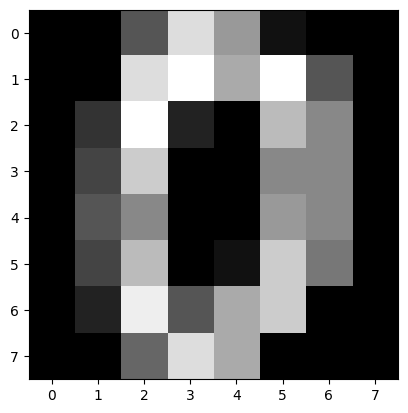

In [4]:
# Visualization of first digit
plt.imshow(digits.images[0], cmap='gray')
plt.show()


Next - divide the data into training and test samples using the train_test_split function from the sklearn.model_selection module

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


## Multiclass classification with the Perceptron model using the one-vs-one strategy

In the scikit-learn (sklearn) library, i will use the sklearn.linear_model.Perceptron classifier.

Create a Perceptron classifier object and set the model parameters. In this case, i use the tol parameter to set the stop criterion (the required accuracy of the solution) and the random_state parameter to set the initial state of the random number generator, which will reproduce the results.

In [7]:
from sklearn.linear_model import Perceptron

clf1 = Perceptron(tol=1e-3, random_state=seed)


In [8]:
assert type(clf1) == Perceptron and clf1.tol == 0.001

Next, i will create an instance of the "one-vs-one" strategy class for multiclass classification

In [9]:
from sklearn.multiclass import OneVsOneClassifier

clf1 = OneVsOneClassifier(clf1)


In [10]:
assert type(clf1) == OneVsOneClassifier

Train the model and make predictions on a test sample.

In [11]:
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)


Let's evaluate the classification accuracy using metrics from the sklearn.metrics module.


In [12]:
perceptron_accuracy_score = accuracy_score(y_test, y_pred1)
perceptron_precision_score = precision_score(y_test, y_pred1, average='macro')
perceptron_recall_score = recall_score(y_test, y_pred1, average='macro')
perceptron_f1_score = f1_score(y_test, y_pred1, average='macro')

# The quality of all metrics should be above 95%

print(f"perceptron_accuracy_score: {perceptron_accuracy_score}")
print(f"perceptron_precision_score: {perceptron_precision_score}")
print(f"perceptron_recall_score: {perceptron_recall_score}")
print(f"perceptron_f1_score: {perceptron_f1_score}")

perceptron_accuracy_score: 0.9666666666666667
perceptron_precision_score: 0.9667979978048044
perceptron_recall_score: 0.9666647210984209
perceptron_f1_score: 0.9658945948627322


In [13]:
assert perceptron_accuracy_score > 0.95
assert perceptron_precision_score > 0.95
assert perceptron_recall_score > 0.95
assert perceptron_f1_score > 0.95

## Multiclass classification with Logistic Regression model with softmax function

In [14]:
from sklearn.linear_model import LogisticRegression


In [15]:
clf2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000)


In [16]:
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)


In [17]:
logreg_accuracy_score = accuracy_score(y_test, y_pred2)
logreg_precision_score = precision_score(y_test, y_pred2, average='macro')
logreg_recall_score = recall_score(y_test, y_pred2, average='macro')
logreg_f1_score = f1_score(y_test, y_pred2, average='macro')


print(f"logreg_accuracy_score: {logreg_accuracy_score}")
print(f"logreg_precision_score: {logreg_precision_score}")
print(f"logreg_recall_score: {logreg_recall_score}")
print(f"logreg_f1_score: {logreg_f1_score}")

logreg_accuracy_score: 0.9722222222222222
logreg_precision_score: 0.9703866461078403
logreg_recall_score: 0.9703844174770208
logreg_f1_score: 0.9700298998661353


In [18]:
assert logreg_accuracy_score > 0.95
assert logreg_precision_score > 0.95
assert logreg_recall_score > 0.95
assert logreg_f1_score > 0.95

## Multiclass classification with the SRM (SVC) model using the "one-vs-one" strategy

In [19]:
from sklearn.svm import SVC


In SVM (Support Vector Machine), the kernel parameter defines the kernel used to calculate distances between points in the feature space. "rbf" is one of the most common kernels and means using the Radial Basis Function as the core. It allows you to model nonlinear dependencies between features and adapts flexibly enough to various forms of data.

The decision_function_shape parameter defines the form of the function for solving a multiclass classification problem. "ovo" (one-vs-one) means that for each pair of classes, a binary classifier is built that separates objects from these two classes. Then, to determine the class of the new object, the model uses voting on all constructed binary classifiers. Another option is "ovr" (one-vs-rest), in which a binary classifier is built for each class, which separates this class from all others. The class of a new object is determined by selecting the classifier that gave the highest value of the decisive function for this object.

In [20]:
clf3 = SVC(kernel='rbf', decision_function_shape="ovo")


In [21]:
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)


In [22]:
svm_accuracy_score = accuracy_score(y_test, y_pred3)
svm_precision_score = precision_score(y_test, y_pred3, average='macro')
svm_recall_score = recall_score(y_test, y_pred3, average='macro')
svm_f1_score = f1_score(y_test, y_pred3, average='macro')

print(f"svm_accuracy_score: {svm_accuracy_score}")
print(f"svm_precision_score: {svm_precision_score}")
print(f"svm_recall_score: {svm_recall_score}")
print(f"svm_f1_score: {svm_f1_score}")

svm_accuracy_score: 0.9916666666666667
svm_precision_score: 0.9910599078341015
svm_recall_score: 0.9909078449646401
svm_f1_score: 0.9908885806721376


In [23]:
assert svm_accuracy_score > 0.95
assert svm_precision_score > 0.95
assert svm_recall_score > 0.95
assert svm_f1_score > 0.95